## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
from tensorflow import keras

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1, l1_l2

def build_mlp(input_shape, num_classes, l1_ratio, neuron_units):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(neuron_units):
        if i == 0:
            x = Dense(n_units, activation='relu', kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = Dense(n_units, activation='relu', kernel_regularizer=l1(l1_ratio))(x)
            
    out = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=[input_layer], outputs=[out])
    
    return model

In [24]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 15
BATCH_SIZE = 512
MOMENTUM = 0.95
L1_RATIO = [1e1, 1e2, 1e3, 1e4]
NEURON_UNITS = [512, 256, 128, 32]

In [26]:
results = {}

for l1_ratio in L1_RATIO:
    keras.backend.clear_session()
    
    model = build_mlp(x_train.shape[1:], 10, l1_ratio, NEURON_UNITS)
    loss = keras.losses.CategoricalCrossentropy()
    optimizer = keras.optimizers.Adam()
    model.compile(loss=loss, metrics=['accuracy'], optimizer=optimizer)
    history = model.fit(x_train, y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_data=(x_test, y_test),
                        shuffle=True)
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    exp_name_tag = 'exp-L1-' + str(l1_ratio)
    results[exp_name_tag] = {'train-loss':  train_loss,
                             'val-loss': val_loss,
                             'train-acc': train_acc,
                             'val-acc': val_acc}
    

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 2s 39us/sample - loss: 82322.5887 - accuracy: 0.1022 - val_loss: 4605.0751 - val_accuracy: 0.1000
Epoch 2/15
50000/50000 [==============================] - 1s 18us/sample - loss: 2688.7137 - accuracy: 0.0980 - val_loss: 2158.5377 - val_accuracy: 0.1000
Epoch 3/15
50000/50000 [==============================] - 1s 17us/sample - loss: 2169.0780 - accuracy: 0.0976 - val_loss: 2215.0751 - val_accuracy: 0.1000
Epoch 4/15
50000/50000 [==============================] - 1s 19us/sample - loss: 2168.7871 - accuracy: 0.0994 - val_loss: 2178.4847 - val_accuracy: 0.1000
Epoch 5/15
50000/50000 [==============================] - 1s 17us/sample - loss: 2166.5406 - accuracy: 0.0972 - val_loss: 2155.8207 - val_accuracy: 0.1000
Epoch 6/15
50000/50000 [==============================] - 1s 17us/sample - loss: 2169.1230 - accuracy: 0.0965 - val_loss: 2185.5467 - val_accuracy: 0.1000
Epoch 7/15
50000/50

50000/50000 [==============================] - 1s 17us/sample - loss: 2167899.0477 - accuracy: 0.0994 - val_loss: 2183402.0000 - val_accuracy: 0.1000
Epoch 7/15
50000/50000 [==============================] - 1s 17us/sample - loss: 2167958.0840 - accuracy: 0.0978 - val_loss: 2160021.2500 - val_accuracy: 0.1000
Epoch 8/15
50000/50000 [==============================] - 1s 18us/sample - loss: 2165378.0559 - accuracy: 0.0976 - val_loss: 2166311.5000 - val_accuracy: 0.1000
Epoch 9/15
50000/50000 [==============================] - 1s 17us/sample - loss: 2167141.8523 - accuracy: 0.0988 - val_loss: 2205181.7500 - val_accuracy: 0.1000
Epoch 10/15
50000/50000 [==============================] - 1s 17us/sample - loss: 2169796.2074 - accuracy: 0.0961 - val_loss: 2151951.0000 - val_accuracy: 0.1000
Epoch 11/15
50000/50000 [==============================] - 1s 17us/sample - loss: 2165220.1234 - accuracy: 0.0990 - val_loss: 2157507.2500 - val_accuracy: 0.1000
Epoch 12/15
50000/50000 [==================

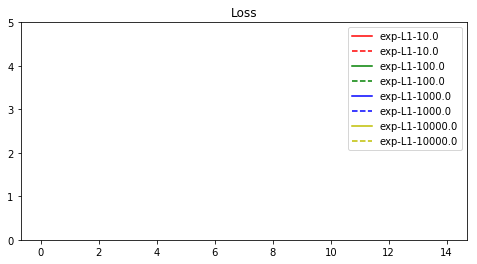

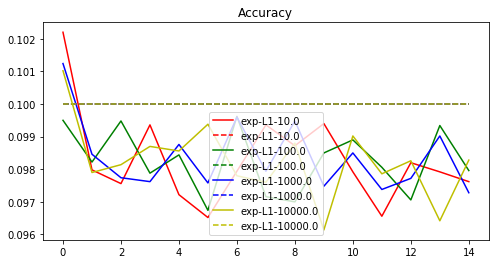

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val-loss'])),results[cond]['val-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val-acc'])),results[cond]['val-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()